# PyCaret Classification

In [ ]:
!pip install pycaret #==3.0.4

In [11]:
import pandas as pd
from pycaret.classification import *
from pycaret.utils import version
version()

'3.0.0'

In [3]:
df = pd.read_csv("sba_clean.csv")
df

,State,BankState,DifState,Sector,AppYear,AppMonth,Term,NoEmp,Secured,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
0,15,38,1,16,30,2,84,4,0,1,0,0,0,1,60000,60000,48000,80,0
1,15,18,0,0,30,2,60,2,0,1,0,0,0,1,40000,40000,32000,80,0
2,15,18,0,7,30,2,180,7,0,0,0,0,0,0,287000,287000,215250,75,0
3,36,39,0,20,30,2,60,2,0,0,0,0,0,1,35000,35000,28000,80,0
4,9,11,0,20,30,2,240,14,1,0,0,0,0,0,229000,229000,229000,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894605,35,17,1,16,30,2,60,6,0,0,0,0,0,0,70000,70000,56000,80,0
894606,35,17,1,16,30,2,60,6,0,0,0,0,1,0,85000,85000,42500,50,0
894607,4,5,0,10,30,2,108,26,0,0,0,0,0,0,300000,300000,225000,75,0
894608,11,14,0,20,30,2,60,6,0,0,0,0,0,1,75000,75000,60000,80,1


## Setting Environment

In [4]:
clf = setup(df, target="Default", session_id=44)

,Description,Value
0,Session id,44
1,Target,Default
2,Target type,Binary
3,Original data shape,"(894610, 19)"
4,Transformed data shape,"(894610, 19)"
5,Transformed train set shape,"(626227, 19)"
6,Transformed test set shape,"(268383, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


## Compare Models

In [5]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9536,0.9818,0.8476,0.8840,0.8654,0.8374,0.8377,121.4670
lightgbm,Light Gradient Boosting Machine,0.9495,0.9789,0.8240,0.8816,0.8518,0.8215,0.8221,23.9160
rf,Random Forest Classifier,0.9480,0.9754,0.7980,0.8950,0.8437,0.8126,0.8146,8.7660
et,Extra Trees Classifier,0.9362,0.9647,0.7155,0.9021,0.7980,0.7607,0.7679,144.5730
gbc,Gradient Boosting Classifier,0.9354,0.9655,0.7547,0.8612,0.8044,0.7659,0.7683,63.4230
dt,Decision Tree Classifier,0.9255,0.8732,0.7924,0.7861,0.7893,0.7440,0.7440,1.7620
ada,Ada Boost Classifier,0.9134,0.9509,0.6724,0.8040,0.7322,0.6811,0.6850,1.3590
knn,K Neighbors Classifier,0.8697,0.8279,0.4724,0.6897,0.5607,0.4874,0.4994,435.0670
lda,Linear Discriminant Analysis,0.8473,0.8329,0.2147,0.7236,0.3312,0.2725,0.3375,3.2100
svm,SVM - Linear Kernel,0.8309,0.0000,0.2626,0.5509,0.3318,0.2564,0.2844,0.8290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

## Create Models

In [6]:
lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8236,0.7997,0.0004,0.1379,0.0007,-0.0002,-0.0022
1,0.8199,0.8119,0.1197,0.4564,0.1897,0.1257,0.1620
2,0.8235,0.8018,0.0002,0.0690,0.0004,-0.0006,-0.0061
3,0.8192,0.8108,0.1167,0.4487,0.1853,0.1214,0.1568
4,0.8203,0.8134,0.1199,0.4606,0.1903,0.1268,0.1637
5,0.8204,0.8145,0.1194,0.4615,0.1898,0.1265,0.1637
6,0.8179,0.8086,0.1171,0.4363,0.1846,0.1190,0.1522
7,0.8203,0.8145,0.1239,0.4615,0.1954,0.1306,0.1669
8,0.8204,0.8128,0.1215,0.4613,0.1924,0.1284,0.1652


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9258,0.8756,0.7982,0.7843,0.7912,0.7461,0.7461
1,0.9250,0.8696,0.7841,0.7887,0.7864,0.7409,0.7409
2,0.9250,0.8733,0.7934,0.7832,0.7883,0.7427,0.7427
3,0.9251,0.8740,0.7952,0.7826,0.7889,0.7433,0.7434
4,0.9256,0.8714,0.7876,0.7895,0.7885,0.7434,0.7434
5,0.9268,0.8747,0.7944,0.7906,0.7925,0.7480,0.7480
6,0.9230,0.8705,0.7895,0.7770,0.7832,0.7364,0.7365
7,0.9260,0.8745,0.7949,0.7871,0.7910,0.7460,0.7461
8,0.9261,0.8752,0.7966,0.7866,0.7916,0.7467,0.7467


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Models

In [10]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8236,0.7997,0.0004,0.1379,0.0007,-0.0002,-0.0022
1,0.8199,0.8119,0.1197,0.4564,0.1897,0.1257,0.1620
2,0.8235,0.8018,0.0002,0.0690,0.0004,-0.0006,-0.0061
3,0.8192,0.8108,0.1167,0.4487,0.1853,0.1214,0.1568
4,0.8203,0.8134,0.1199,0.4606,0.1903,0.1268,0.1637
5,0.8204,0.8145,0.1194,0.4615,0.1898,0.1265,0.1637
6,0.8306,0.8218,0.1605,0.5671,0.2502,0.1871,0.2351
7,0.8203,0.8145,0.1239,0.4615,0.1954,0.1306,0.1669
8,0.8204,0.8128,0.1215,0.4613,0.1924,0.1284,0.1652


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [11]:
print(tuned_lr)

LogisticRegression(C=9.666, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=44, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8962,0.9018,0.5777,0.7756,0.6622,0.6024,0.6115
1,0.8963,0.8980,0.5739,0.7789,0.6609,0.6013,0.6111
2,0.8964,0.9007,0.5761,0.7780,0.6620,0.6025,0.6119
3,0.8968,0.8990,0.5774,0.7793,0.6633,0.6039,0.6134
4,0.8959,0.9004,0.5671,0.7820,0.6574,0.5979,0.6087
5,0.8988,0.9041,0.5882,0.7828,0.6717,0.6133,0.6220
6,0.8969,0.9003,0.5767,0.7802,0.6632,0.6040,0.6136
7,0.8957,0.9005,0.5755,0.7743,0.6603,0.6003,0.6095
8,0.8960,0.9012,0.5770,0.7748,0.6614,0.6015,0.6106


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [13]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=44, splitter='best')


## Ensemble Models

In [15]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9471,0.9680,0.8226,0.8697,0.8455,0.8136,0.8140
1,0.9468,0.9664,0.8143,0.8750,0.8435,0.8115,0.8123
2,0.9463,0.9664,0.8198,0.8680,0.8432,0.8109,0.8114
3,0.9462,0.9666,0.8179,0.8690,0.8427,0.8103,0.8108
4,0.9472,0.9672,0.8148,0.8767,0.8446,0.8129,0.8137
5,0.9486,0.9676,0.8300,0.8717,0.8504,0.8193,0.8197
6,0.9459,0.9673,0.8190,0.8667,0.8422,0.8096,0.8100
7,0.9466,0.9682,0.8179,0.8710,0.8436,0.8114,0.8120
8,0.9470,0.9663,0.8190,0.8722,0.8447,0.8128,0.8134


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [16]:
boosted_dt = ensemble_model(dt, method="Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9276,0.9195,0.7921,0.7958,0.7939,0.7500,0.7500
1,0.9273,0.9163,0.7820,0.8004,0.7911,0.7471,0.7471
2,0.9271,0.9169,0.7911,0.7942,0.7926,0.7484,0.7484
3,0.9270,0.9171,0.7942,0.7920,0.7931,0.7488,0.7488
4,0.9282,0.9172,0.7818,0.8048,0.7931,0.7497,0.7498
5,0.9287,0.9183,0.7952,0.7990,0.7971,0.7539,0.7539
6,0.9264,0.9186,0.7872,0.7932,0.7902,0.7456,0.7456
7,0.9265,0.9197,0.7882,0.7932,0.7907,0.7462,0.7462
8,0.9285,0.9213,0.7970,0.7969,0.7969,0.7535,0.7535


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Blend Models

In [17]:
blender = blend_models(estimator_list=[lr, dt], method="soft")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9258,0.9235,0.7982,0.7843,0.7912,0.7461,0.7461
1,0.9250,0.9223,0.7841,0.7887,0.7864,0.7409,0.7409
2,0.9250,0.9208,0.7934,0.7832,0.7883,0.7427,0.7427
3,0.9251,0.9231,0.7952,0.7826,0.7889,0.7433,0.7434
4,0.9256,0.9234,0.7876,0.7895,0.7885,0.7434,0.7434
5,0.9268,0.9253,0.7944,0.7906,0.7925,0.7480,0.7480
6,0.9230,0.9187,0.7895,0.7770,0.7832,0.7364,0.7365
7,0.9260,0.9245,0.7949,0.7871,0.7910,0.7460,0.7461
8,0.9261,0.9237,0.7966,0.7866,0.7916,0.7467,0.7467


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [18]:
blender.estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=44, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=44, splitter='best')]

## Analyze Model

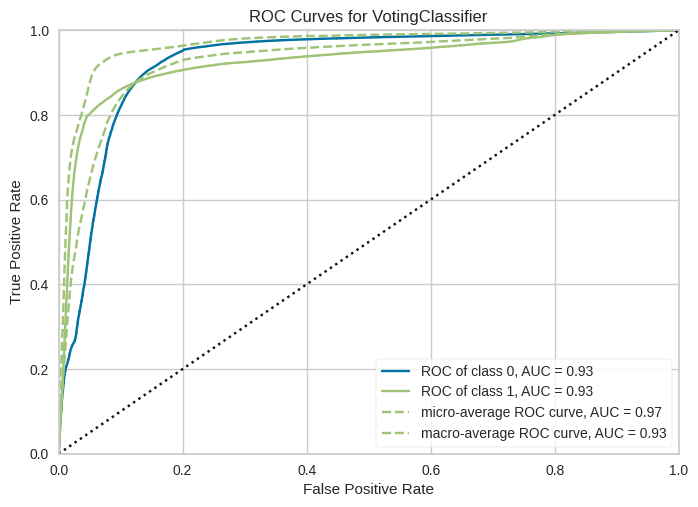

In [19]:
plot_model(blender)

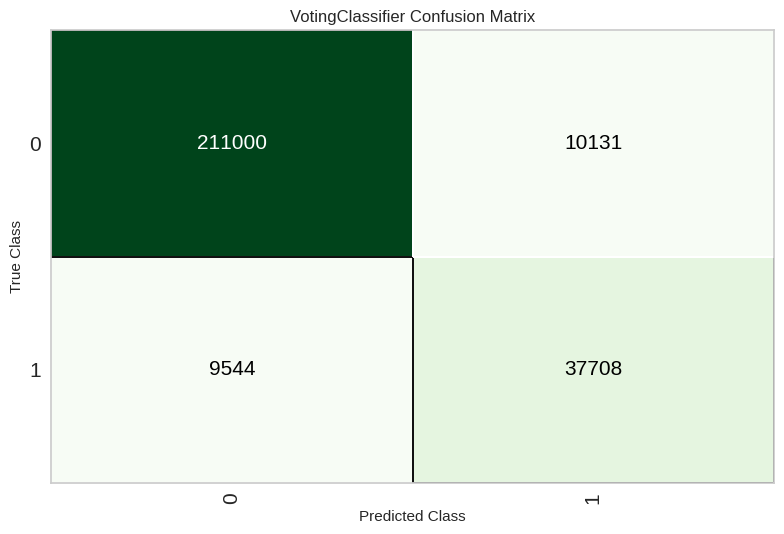

In [20]:
plot_model(blender, plot="confusion_matrix")

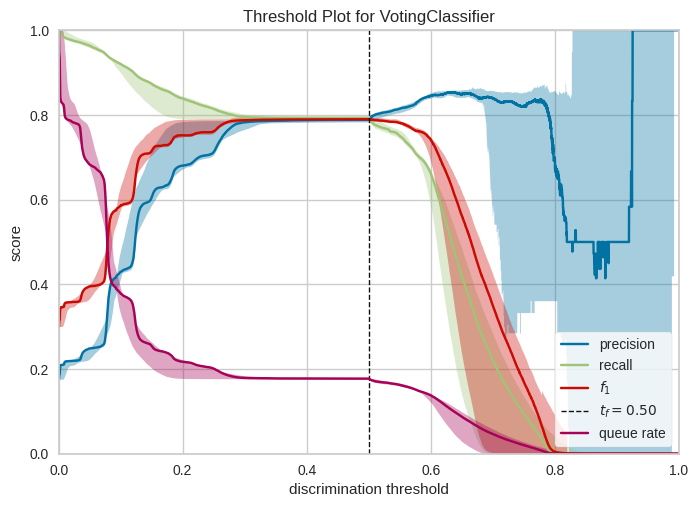

In [21]:
plot_model(blender, plot="threshold")

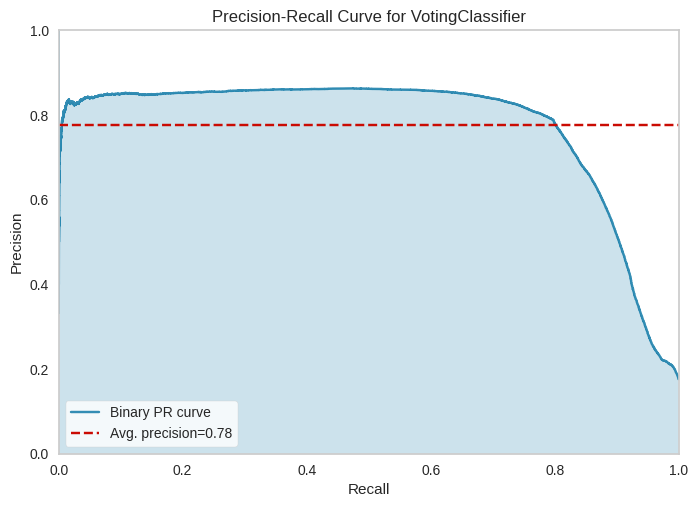

In [22]:
plot_model(blender, plot="pr")

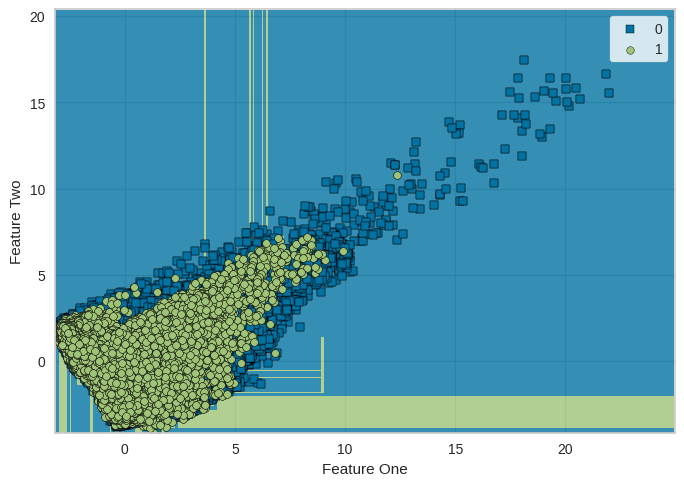

In [23]:
plot_model(blender, plot="boundary")

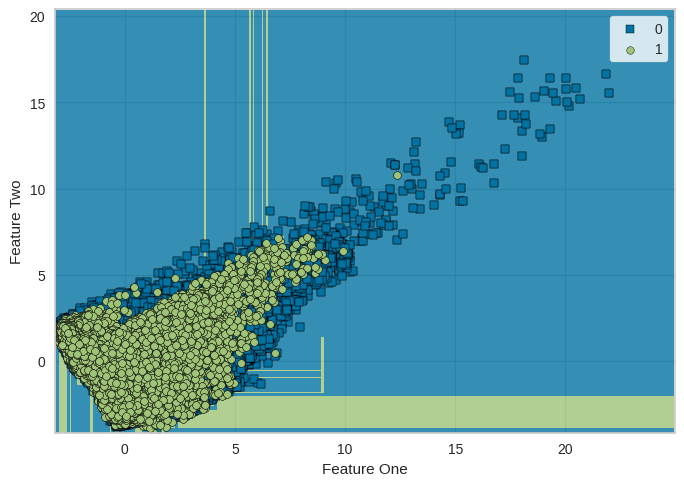

In [24]:
plot_model(dt, plot="boundary")

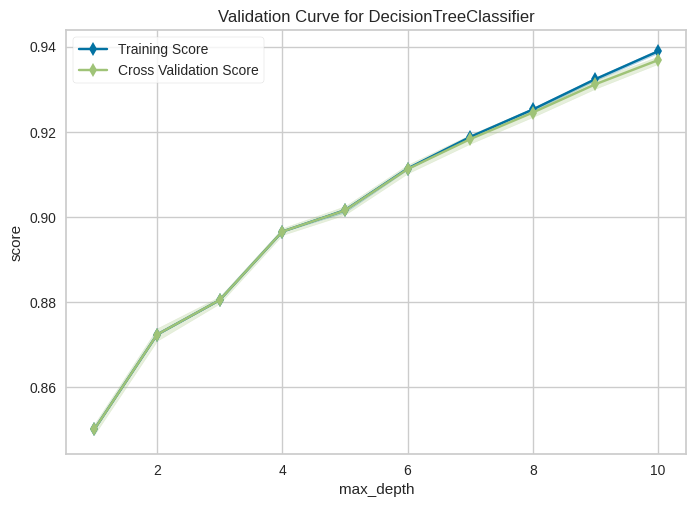

In [25]:
plot_model(tuned_dt, plot="vc")

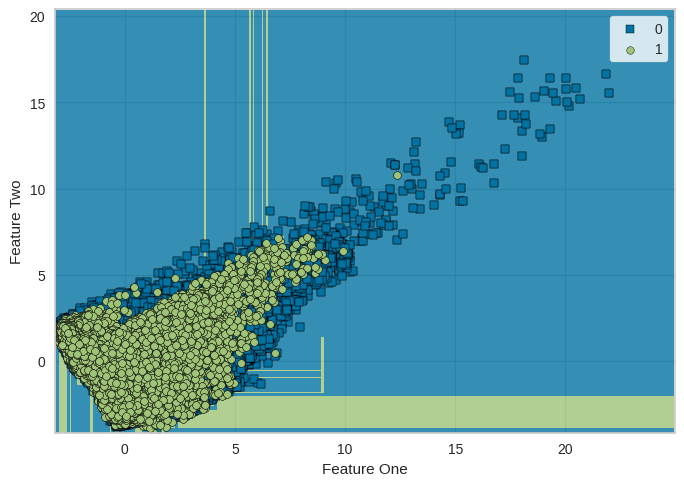

In [26]:
plot_model(tuned_dt, plot="boundary")

In [27]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…